DATA CLEANING PROCESS 


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data = pd.read_csv(r'C:\Users\ankur\OneDrive\Desktop\youtube_channel_real_performance_analytics.csv')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
data.shape
data.head()
# data.columns
data.dtypes

ID                                      int64
Video Duration                        float64
Video Publish Time                     object
Days Since Publish                      int64
Day                                     int64
Month                                   int64
Year                                    int64
Day of Week                            object
Revenue per 1000 Views (USD)          float64
Monetized Playbacks (Estimate)        float64
Playback-Based CPM (USD)              float64
CPM (USD)                             float64
Ad Impressions                        float64
Estimated AdSense Revenue (USD)       float64
DoubleClick Revenue (USD)             float64
YouTube Ads Revenue (USD)             float64
Watch Page Ads Revenue (USD)          float64
YouTube Premium (USD)                 float64
Transaction Revenue (USD)             float64
Transactions                          float64
Revenue from Transactions (USD)       float64
Reactions                         

In [5]:
data.info()
data.isnull().sum()
data.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

np.int64(0)

In [6]:
data["Video Publish Time"]=pd.to_datetime(data["Video Publish Time"], errors='coerce')

In [7]:
data["Day of Week"]=data["Day of Week"].astype('category')

EDA

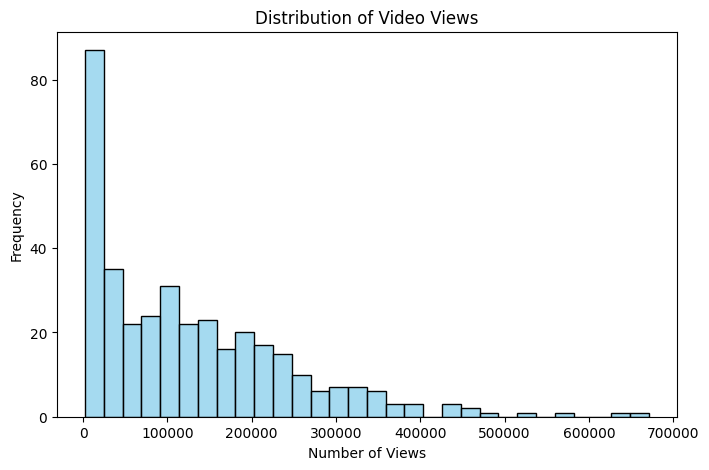

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(data['Views'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Video Views')
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.show()

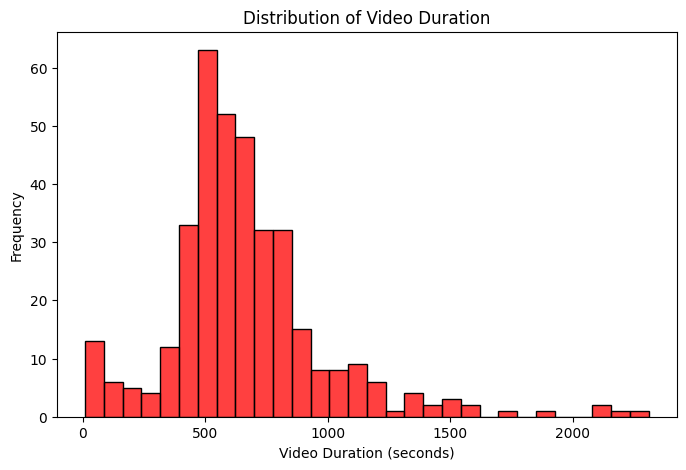

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(data['Video Duration'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of Video Duration')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

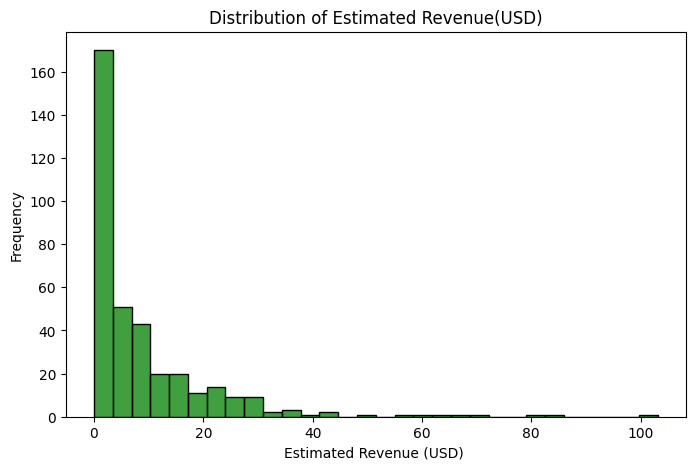

In [10]:
plt.figure(figsize=(8,5) )
sns.histplot(data['Estimated Revenue (USD)'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Estimated Revenue(USD)')
plt.xlabel('Estimated Revenue (USD) ')
plt.ylabel('Frequency')
plt.show()

RELATIONSHIP ANALYSIS 


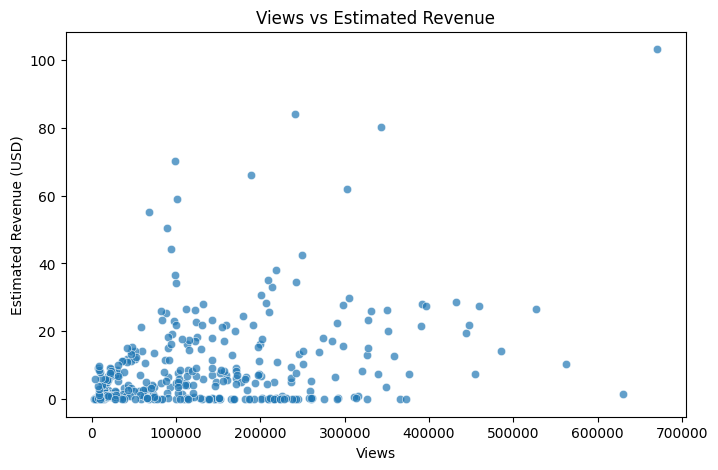

In [11]:
# Views vs Revenue
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["Views"], y=data["Estimated Revenue (USD)"], alpha=0.7)
plt.title("Views vs Estimated Revenue")
plt.xlabel("Views")
plt.ylabel("Estimated Revenue (USD)")
plt.show()


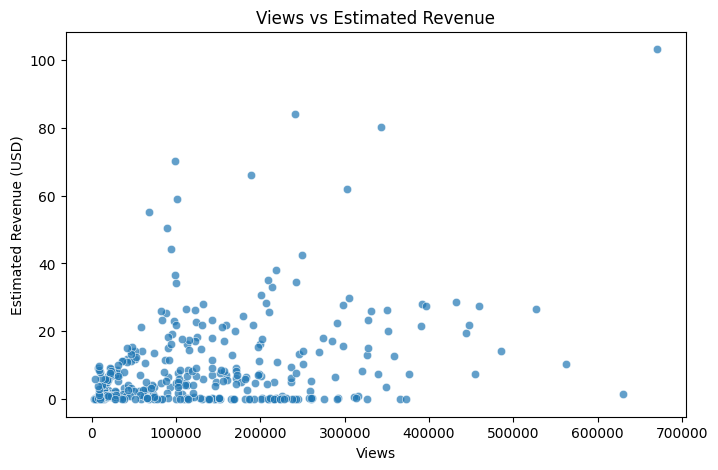

In [12]:
#Video Duration vs Views
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["Views"], y=data["Estimated Revenue (USD)"], alpha=0.7)
plt.title("Views vs Estimated Revenue")
plt.xlabel("Views")
plt.ylabel("Estimated Revenue (USD)")
plt.show()


In [13]:
data["Engagement_Rate"] = (
    (data["Likes"] + data["Shares"] + data["New Comments"]) / data["Views"]
) * 100


In [14]:
# Engagement vs Views
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Engagement_Rate"], y=df["Views"], alpha=0.7)
plt.title("Engagement Rate vs Views")
plt.xlabel("Engagement Rate (%)")
plt.ylabel("Views")
plt.show()


NameError: name 'df' is not defined

<Figure size 800x500 with 0 Axes>

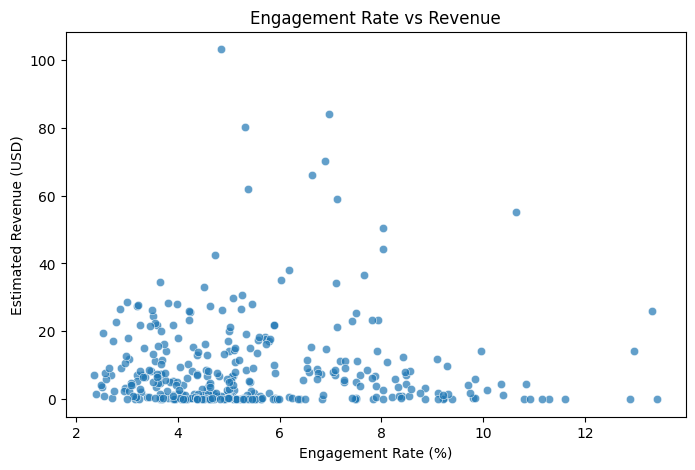

In [ ]:
# Engagement vs Revenue
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["Engagement_Rate"], y=data["Estimated Revenue (USD)"], alpha=0.7)
plt.title("Engagement Rate vs Revenue")
plt.xlabel("Engagement Rate (%)")
plt.ylabel("Estimated Revenue (USD)")
plt.show()


Time-Based Analysis

C:\Users\ankur\AppData\Local\Temp\ipykernel_23204\3651126333.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("Day of Week")["Views"]


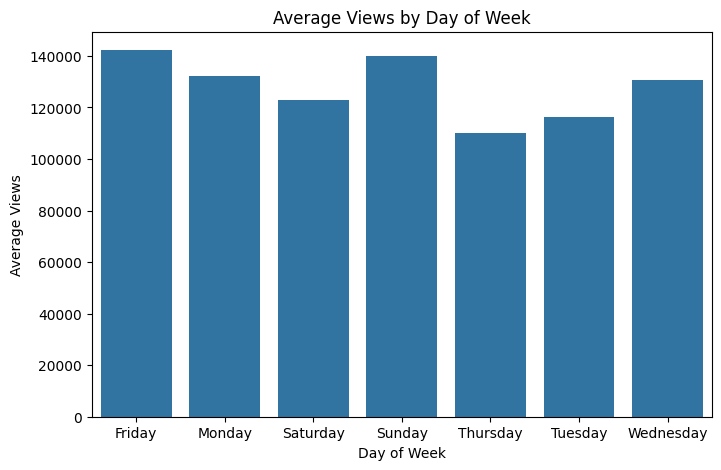

In [ ]:
# Performance by Day of Week
day_views = (
    data.groupby("Day of Week")["Views"]
    .mean()
    .reset_index()
    .sort_values(by="Views", ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(x="Day of Week", y="Views", data=day_views)
plt.title("Average Views by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Views")
plt.show()


C:\Users\ankur\AppData\Local\Temp\ipykernel_23204\4206134730.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("Day of Week")["Estimated Revenue (USD)"]


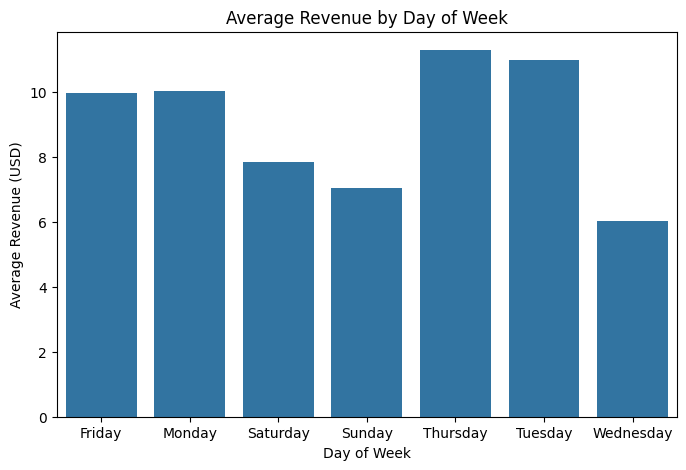

In [ ]:
# Revenue by Day of Week
day_revenue = (
    data.groupby("Day of Week")["Estimated Revenue (USD)"]
    .mean()
    .reset_index()
    .sort_values(by="Estimated Revenue (USD)", ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(x="Day of Week", y="Estimated Revenue (USD)", data=day_revenue)
plt.title("Average Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Revenue (USD)")
plt.show()


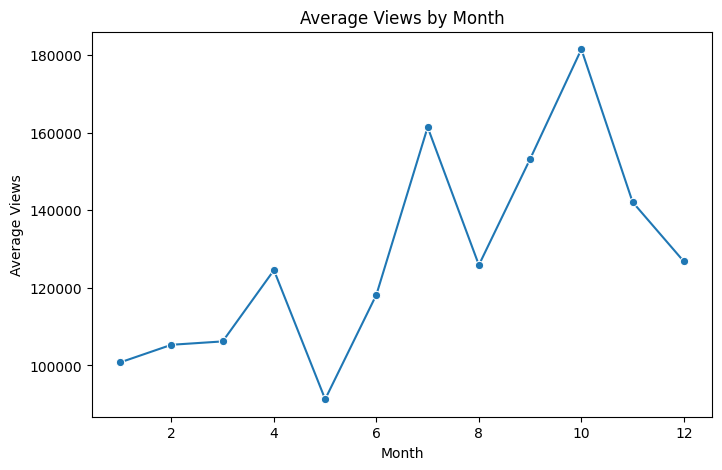

In [ ]:
# Monthly Performance Trend
month_views = (
    data.groupby("Month")["Views"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.lineplot(x="Month", y="Views", data=month_views, marker="o")
plt.title("Average Views by Month")
plt.xlabel("Month")
plt.ylabel("Average Views")
plt.show()


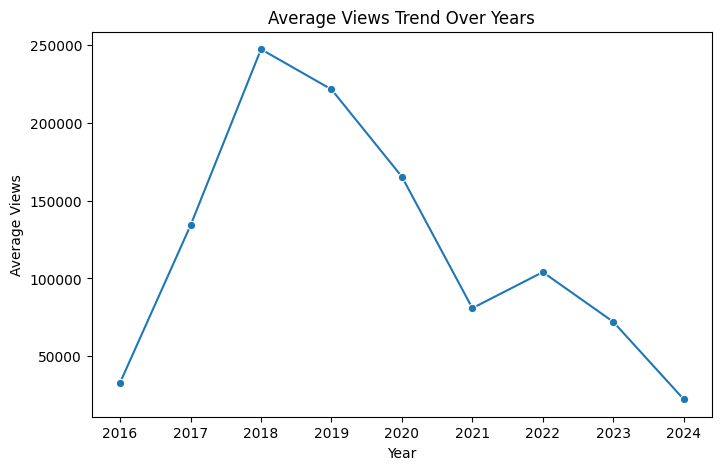

In [ ]:
# Performance Trend Over Years
year_views = (
    data.groupby("Year")["Views"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.lineplot(x="Year", y="Views", data=year_views, marker="o")
plt.title("Average Views Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Average Views")
plt.show()


Audience & Monetization Analysis

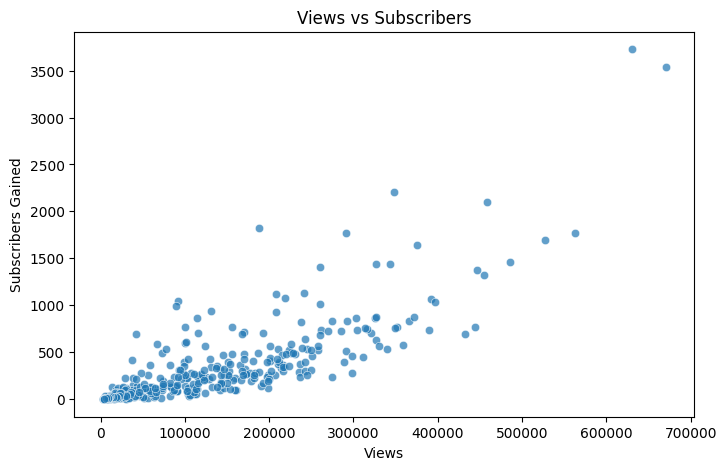

In [ ]:
# Views vs Subscribers (Audience Growth)
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["Views"], y=data["Subscribers"], alpha=0.7)
plt.title("Views vs Subscribers")
plt.xlabel("Views")
plt.ylabel("Subscribers Gained")
plt.show()


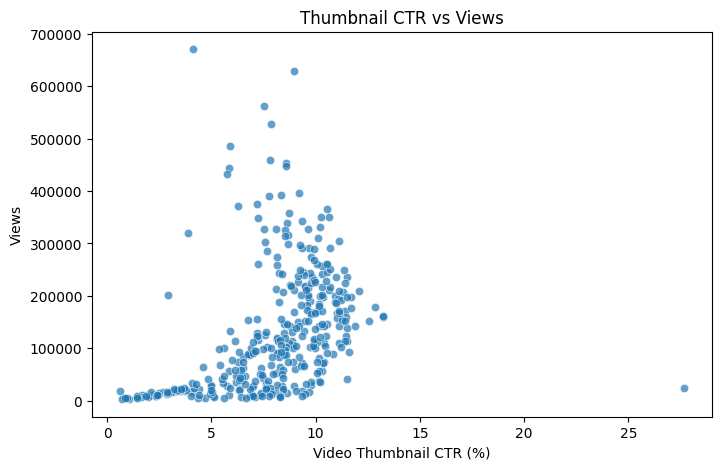

In [ ]:
# CTR (Thumbnail Performance) vs Views
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=data["Video Thumbnail CTR (%)"],
    y=data["Views"],
    alpha=0.7
)
plt.title("Thumbnail CTR vs Views")
plt.xlabel("Video Thumbnail CTR (%)")
plt.ylabel("Views")
plt.show()


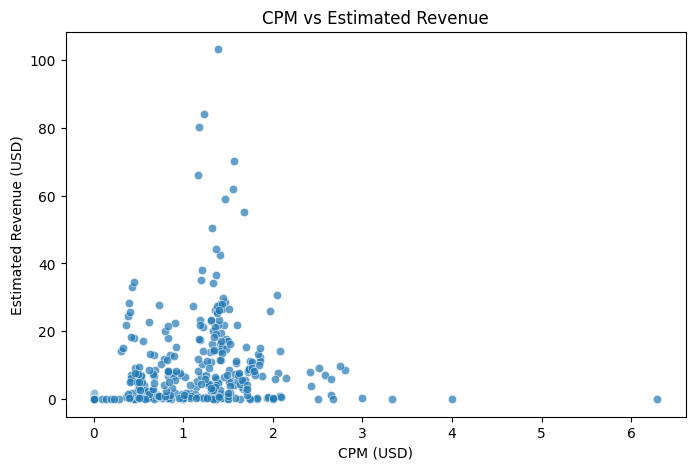

In [ ]:
# CPM vs Revenue
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=data["CPM (USD)"],
    y=data["Estimated Revenue (USD)"],
    alpha=0.7
)
plt.title("CPM vs Estimated Revenue")
plt.xlabel("CPM (USD)")
plt.ylabel("Estimated Revenue (USD)")
plt.show()


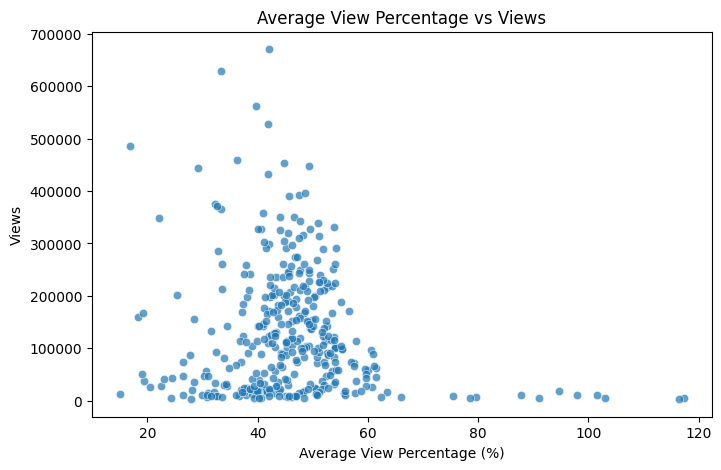

In [ ]:
# Retention: Average View Percentage vs Views
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=data["Average View Percentage (%)"],
    y=data["Views"],
    alpha=0.7
)
plt.title("Average View Percentage vs Views")
plt.xlabel("Average View Percentage (%)")
plt.ylabel("Views")
plt.show()


In [15]:
data.to_csv(r'C:\Users\ankur\OneDrive\Desktop\CLEANED_youtube_channel_performance_analytics.csv', index=False)